<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/09_Cluster_Analysis_in_Python/01_%20Introduction_to_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 01. Intro to Supervizes Learning

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier




url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/09_Cluster_Analysis_in_Python/dataset/fifa_18_sample_data.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
fifa = pd.read_csv(url).apply(pd.to_numeric, errors='coerce')
display(fifa.head())

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,NaN,NaN,NaN,NaN,2228,32,NaN,NaN,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,NaN,NaN,NaN,NaN,2158,30,NaN,NaN,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,NaN,NaN,NaN,NaN,2100,25,NaN,NaN,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,NaN,NaN,NaN,NaN,2291,30,NaN,NaN,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,NaN,NaN,NaN,NaN,1493,31,NaN,NaN,193.0,...,False,False,False,False,False,False,False,False,False,True


Unsupervised learning in real world
Which of the following examples can be solved with unsupervised learning?

- A list of tweets to be classified based on their sentiment, the data has tweets associated with a positive or negative sentiment.
[ no - As the tweets are labeled as positive or negative, a supervised learning algorithm is used. ]

- A spam recognition system that marks incoming emails as spam, the data has emails marked as spam and not spam.
[ no - As the emails are labeled, a supervised learning algorithm is used.]

- --Segmentation of learners at DataCamp based on courses they complete. The training data has no labels.
[ As the training data has no labels, an unsupervised algorithm needs to be used to understand patterns in the data. ]

**Pokémon sightings: hierarchical clustering**  
We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Remember that in the scatter plot of the previous exercise, you identified two areas where Pokémon sightings were dense. This means that the points seem to separate into two clusters. In this exercise, you will form two clusters of the sightings using hierarchical clustering.

'x' and 'y' are columns of X and Y coordinates of the locations of sightings, stored in a pandas DataFrame, df. The following are available for use: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.

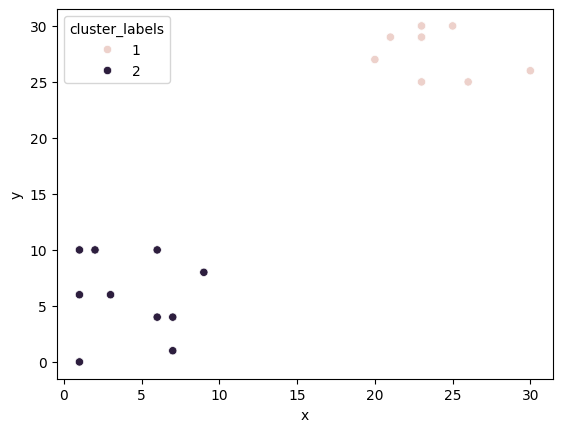

In [6]:
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

df = pd.DataFrame(
    {"x" : [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23],
     "y" : [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30],
     "cluster_labels" : [2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1]}
)
# Use the linkage() function to compute distance
Z = linkage(df[['x', 'y']], 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x="x", y="y", hue="cluster_labels", data=df)
plt.show()

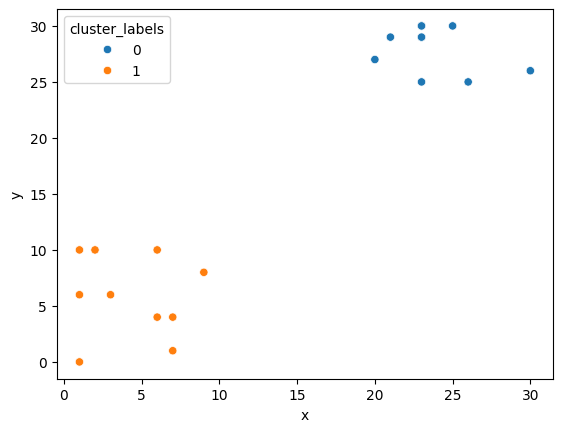

In [16]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
# Exclude the 'cluster_labels' column as it's not needed for clustering and is not a float type
df["x"] = df["x"].astype(float)
df['y'] = df['y'].astype(float)
centroids,_ = kmeans(df[['x', 'y']], 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df[['x', 'y']], centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

**Normalize basic list data**  
Now that you are aware of normalization, let us try to normalize some data. goals_for is a list of goals scored by a football team in their last ten matches. Let us standardize the data using the whiten() function.

In [17]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

#  Notice the scaled values have less variations in them. You will now visualize the data

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


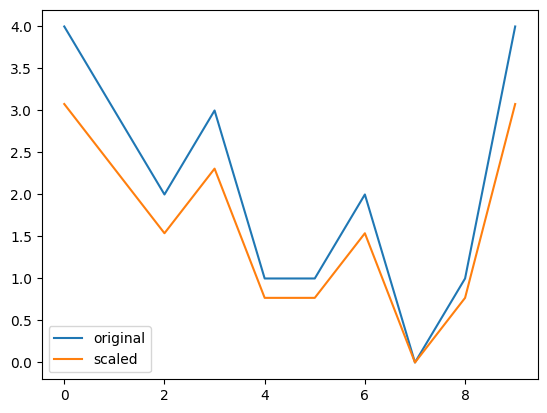

In [18]:
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

#  the scaled values have lower variations in them.

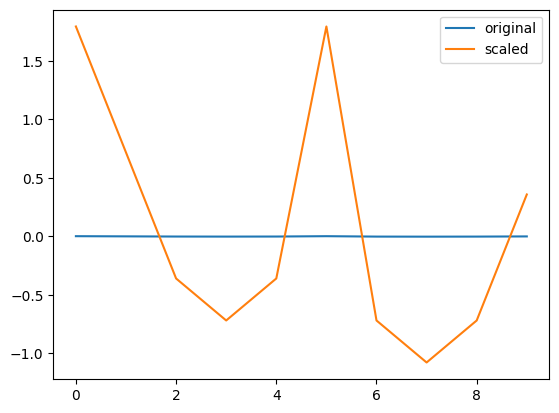

In [19]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

# how the changes in the original data are negligible as compared to the scaled data

**FIFA 18: Normalize data**  
FIFA 18 is a football video game that was released in 2017 for PC and consoles. The dataset that you are about to work on contains data on the 1000 top individual players in the game. You will explore various features of the data as we move ahead in the course. In this exercise, you will work with two columns, eur_wage, the wage of a player in Euros and eur_value, their current transfer market value.

The data for this exercise is stored in a pandas DataFrame, fifa. whiten from scipy.cluster.vq and matplotlib.pyplot as plt have been pre-loaded.

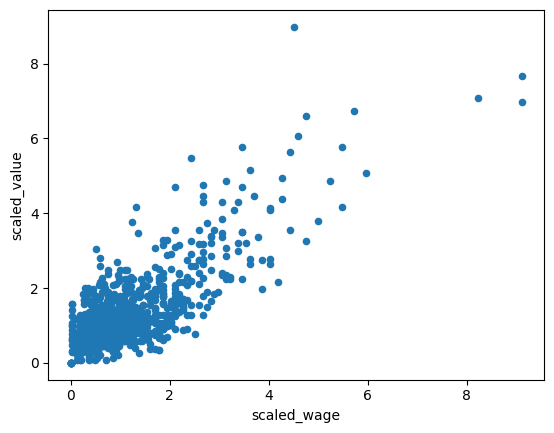

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [21]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind = 'scatter')
plt.show()

# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())

# scaled values have a standard deviation of 1.